# Fiche n°6 : Mouvement 2D et variations du vecteur vitesse

L’étude du mouvement d’une balle de golf à partir d’une chronophotographie est cette fois complétée par le tracé des variations du vecteur vitesse au cours du temps. 

**Capacités numériques** :
* représenter des vecteurs vitesse d’un système modélisé par un point lors d’un mouvement à l’aide d’un langage de programmation.
* représenter des vecteurs variation de vitesse d’un système modélisé par un point lors d’une évolution unidimensionnelle ou bidimensionnelle à l’aide d’un langage de programmation.

Les outils précédents sont réutilisés. Le début du script est inchangé. Comme la construction des variations de vitesse est très sensible aux incertitudes de pointé des positions, il est sage de prendre des points suffisamment éloignés les uns des autres.

Ainsi, on utilise ici des valeurs mesurées espacées de 0.1s. Les mesures utilisées sont entrées dans les deux tableaux suivants :

In [0]:
import numpy as np
import matplotlib.pyplot as plt

x=np.array([0.01,0.41,0.91,1.39,1.86,2.33,2.81,3.33,3.79,4.31,4.83,5.36,5.86,6.34,6.77])
y=np.array([0.01,0.52,1.01,1.42,1.77,2.02,2.16,2.19,2.13,1.96,1.71,1.38,0.97,0.50,0])
t=0.1*np.arange(len(x)) # on définit une base de temps de la même taille que les tableaux de mesures (ici selon ux)
                        # avec un espacement des valeurs temporelles de 0.1s

## 1. Construction de la liste des vecteurs vitesse

Le script utilise deux listes : l’une contenant les valeurs successives de la vitesse horizontale, l’autre, celles de la vitesse verticale. Ces valeurs sont calculées une à une au moyen d’une boucle **for** puis ajoutées aux listes grâce à la fonction **append**. 

Le script débute l’initialisation de la liste : la ligne vxl=[] qui crée une liste vide. Puis pour chaque élément d’une liste redimensionnée (il est impossible de calculer x[i+2]), la vitesse horizontale vx est calculée, puis ajoutée à la liste vxl, grâce à **vxl.append(vx)**. Cela donne, pour les deux coordonnées :


In [0]:
vxl=[] # on crée une liste vide
m=np.arange(len(t)-2)   # on crée une liste d'entiers qui va aller jusqu'à N-2 
                        # pour pouvoir faire des différences finies jusqu'à N-2
# on lance la boucle    
for i in m :
    vx=(x[i+2]-x[i])/(t[i+2]-t[i]) # on calcule la vitesse par la méthode des différences de i à i+2
    vxl.append(vx)                 # on complète la liste des vxl 

# idem pour vyl
vyl=[]
m=np.arange(len(t)-2)
for i in m :
    vy=(y[i+2]-y[i])/(t[i+2]-t[i])
    vyl.append(vy)

## 2. Construction de la liste des vecteurs variation de vitesse par unité de temps 

Avec exactement la même démarche, il est possible de faire calculer les variations des vitesses horizontale et verticale par unité de temps. Il faut simplement, là encore, prendre garde à redimensionner les listes. 


In [0]:
# idem pour l'accélération, mais il faut là encore faire attention à la taille de la liste
axl=[]
m=np.arange(len(t)-4)
for i in m :
    ax=(vxl[i+2]-vxl[i])/(t[i+2]-t[i])
    axl.append(ax)

ayl=[]
m=np.arange(len(t)-4)
for i in m :
    ay=(vyl[i+2]-vyl[i])/(t[i+2]-t[i])
    ayl.append(ay)

## 3. Représentation des vecteurs variation de vitesse

Il est alors possible de tracer les vecteurs variation de vitesse par unité de temps pour les diverses positions, en prenant garde à l’affectation des points. En effet, la construction de la liste des valeurs de vitesse décale, comme celle de l’accélération, de 1, la ième valeur de la liste axl, axl[i], correspond en fait à l’accélération horizontale pour le point i+2. Il faut aussi prendre garde à l’échelle des vecteurs (c’est le facteur 0.1). Ainsi, le script s’écrit :


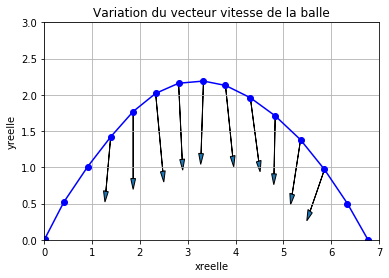

In [0]:
m=np.arange(1,len(t)-4)
for i in m :
    # on fait tracer des vecteurs de positions initiales x[i+2],y[i+2], de coordonnées 0.1*axl[i]
    # et idem pour uy, avec une largeur de tête donnée
    plt.arrow(x[i+2],y[i+2],0.1*axl[i],0.1*ayl[i],head_width=0.1)
plt.xlim(0,7)
plt.ylim(0,3)
plt.grid()
plt.plot(x,y,'bo-')
plt.xlabel("xreelle")
plt.ylabel("yreelle")
plt.title("Variation du vecteur vitesse de la balle")
plt.show()

**Conclusion** : Cette activité illustre le fait que les variations du vecteur vitesse sont pratiquement verticales, dans le sens descendant. L’activité suivante aborde les problèmes et les solutions que l’on peut illustrer dans le cadre de cette étude. La dernière activité propose une exploitation un peu plus convaincante en termes scientifiques et esthétiques. 